# Karar ağaçları

Karar ağaçları, hem sınıflandırma hem de regresyon amacıyla kullanılabilecek bir denetimli öğrenme şeklidir. Genellikle sınıflandırma amaçları için kullanılmaktadır. Model bir örnek alır ve sonra ağaçtan aşağı gider ve belirli bir koşullu ifadeye karşı önemli özellikleri test eder. Sonuca bağlı olarak, sol ya da sağ çocuk dalına yönelir ve dallanma ondan sonra devam eder. Genellikle işlemdeki en önemli özellikler ağacın köküne daha yakın olanlardır.

Karar ağaçları gittikçe daha popüler hale geliyor ve özellikle herhangi bir veri bilimcisinin repertuarlarında sahip oldukları , özellikle de rastgele ormanlar, güçlendirme ve torbalama gibi tekniklerle birleştirildiğinde güçlü bir öğrenme algoritması olarak hizmet edebiliyor . Bir kez daha karar ağaçlarının temel işlevlerine daha ayrıntılı bir bakış için aşağıdaki videoya gözatabilirsiniz.

[link](https://www.youtube.com/watch?time_continue=557&v=eKD5gxPPeY0)

## Temel Kütüphaneleri Çalışma alanımıza ekliyoruz

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

## Veri Setini çalışma ortamına yüklüyoruz

In [2]:
from sklearn import tree
df = pd.read_csv('../saitalay/iris_df.csv')
df.columns = ['X1', 'X2', 'X3', 'X4', 'Y']
df.head()

,X1,X2,X3,X4,Y
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


##  Uygulama

In [4]:
from sklearn.cross_validation import train_test_split
decision = tree.DecisionTreeClassifier(criterion = 'gini')
X = df.values[:, 0:4]
Y = df.values[:, 4]
trainX, testX, trainY, testY = train_test_split(X, Y, test_size = 0.3)
decision.fit(trainX, trainY)
print('Doğruluk Oranı: \n', decision.score(testX, testY))

Doğruluk Oranı: 
 0.8444444444444444


## Modelimizin çıktısını görselleştiriyoruz

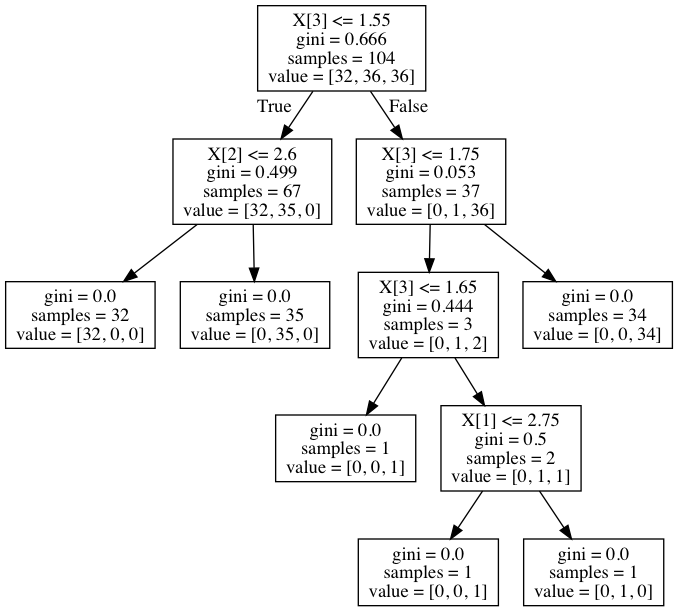

In [5]:
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus as pydot
dot_data = StringIO()
tree.export_graphviz(decision, out_file = dot_data)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())